## Morfometric measurements of neuromuscular junctions:
- elav
- elavxCg4190

##### Data was generated randomly using normal distribution.

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import color
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# my functions

def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')
    
    
def make_line_name_from_image(file_path):
    """From filename extracts line name"""
    """elavXcg4190-3D.tif => elavXcg4190"""
    
    return file_path[file_path.find("elav"):file_path.find("-3D")]


def make_line_name_from_csv(file_path):
    """From csv filename extracts line name"""
    """2-elavcg-4=> elavXcg4190"""
    """2-elav-4 => elav"""
    if "elav-" in file_path:
        return "elav"
    elif "elavcg" in file_path:
        return "elavxCG4190"
    raise Exception('Unrecognized file path: ' + file_path)
    
def make_branches_from_csv(file_path):
    """csv contains number of branches in name"""
    return int(file_path[-5])

def number_of_buttons_in_csv(file_path):
    csv = pd.read_csv(file_path)
    return len(csv["Length"])

def radii_from_csv(file_path):
    csv = pd.read_csv(file_path)
    radii = []
    for radius in csv["Length"]:
        radii.append(round(((radius*30)/81)/2, 2))
    mean_radius = round(np.mean(radii), 2)
    std_radius = round(np.std(radii), 2)
    return radii, mean_radius, std_radius


def collect_all_data_from_csv(file_path):
    radii, mean_radius, std_radius = radii_from_csv(file_path)
    dictionary = {
        "line" : make_line_name_from_csv(file_path),
        "number of branches" : make_branches_from_csv(file_path),
        "number of buttons" : number_of_buttons_in_csv(file_path),
        "radii" : radii,
        "mean radius [um]": mean_radius,
        #"radii standard deviation" : std_radius # resinging form this parameter - not significant
    }
    return dictionary


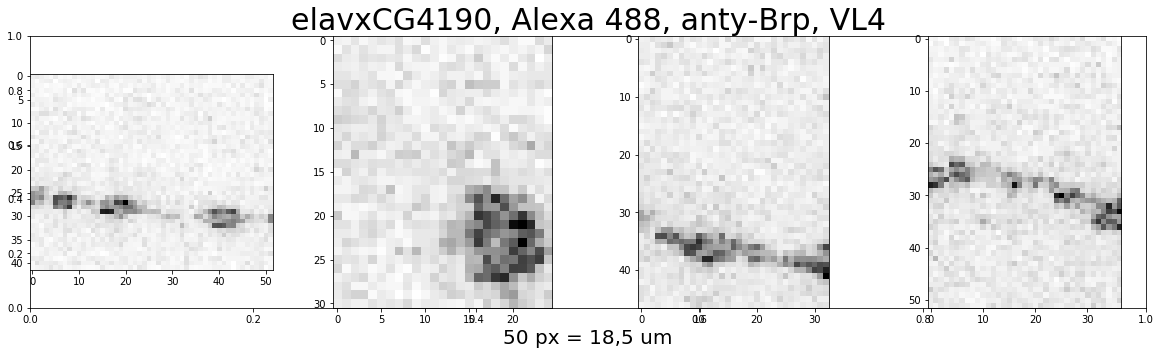

In [14]:
# Show all images
elav_cg_images = glob.glob("images/*elavXcg4190-3D*.tif")
fig = plt.figure(figsize=(20, 5))
plt.title("elavxCG4190, Alexa 488, anty-Brp, VL4",fontdict={"fontsize": 30})
plt.xlabel("50 px = 18,5 um", fontdict={"fontsize": 20})
subplots = fig.subplots(int(len(elav_cg_images)/4), 4).flatten()
for subplot, item in zip(subplots, elav_cg_images):
    im=plt.imread(item)
    im = color.rgba2rgb(im) # change rgba to rgb
    gray_im = color.rgb2gray(im)
    gray_im = im[:, :, 0]
    subplot.imshow(gray_im, cmap="binary")#.set_cmap('nipy_spectral')
#plt.savefig("elavxCG4190 Alexa, anty-Brp, VL4")

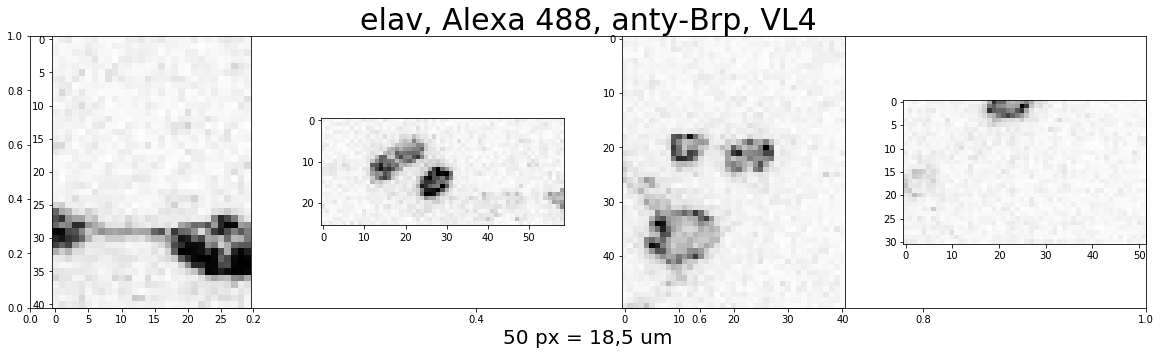

In [4]:
elav_cg_images = glob.glob("images/*elav-3D*.tif")
fig = plt.figure(figsize=(20, 5))
plt.title("elav, Alexa 488, anty-Brp, VL4",fontdict={"fontsize": 30})
plt.xlabel("50 px = 18,5 um", fontdict={"fontsize": 20})
subplots = fig.subplots(int(len(elav_cg_images)/4), 4).flatten()
for subplot, item in zip(subplots, elav_cg_images):
    im=plt.imread(item)
    im = color.rgba2rgb(im) # change rgba to rgb
    gray_im = color.rgb2gray(im)
    gray_im = im[:, :, 0]
    subplot.imshow(gray_im, cmap="binary")#.set_cmap('nipy_spectral')
#plt.savefig("elav Alexa, anty-Brp, VL4")

## All Data

In [5]:
records = []
for file_path in glob.glob("data/*-elav*-*.csv"):
    records.append(collect_all_data_from_csv(file_path))
    
df = pd.DataFrame(records)
df = df.sort_values(by="line", ascending=False)
df

,line,mean radius [um],number of branches,number of buttons,radii
2,elavxCG4190,0.86,5,8,"[1.86, 0.25, 0.86, 0.5, 0.38, 0.74, 0.72, 1.58]"
4,elavxCG4190,1.01,4,8,"[0.74, 1.32, 0.79, 0.34, 0.39, 1.08, 1.58, 1.81]"
5,elavxCG4190,1.12,6,10,"[1.47, 0.97, 1.95, 1.56, 0.82, 1.05, 0.52, 1.0..."
0,elav,1.41,3,7,"[0.74, 0.31, 1.31, 1.44, 2.83, 1.3, 1.96]"
1,elav,1.17,3,4,"[0.57, 1.0, 1.23, 1.87]"
3,elav,1.91,3,3,"[2.36, 1.93, 1.43]"
6,elav,1.37,3,3,"[1.66, 0.49, 1.96]"


In [6]:
df['mean radius [um]'] = np.random.normal(loc=1, scale=0.16,size=len(df))
df['number of branches'] = np.random.normal(loc=3.4, scale=1.21, size=len(df))
df['number of buttons'] = np.random.normal(loc=17, scale=7, size=len(df))
#csv.head()
df.head()

,line,mean radius [um],number of branches,number of buttons,radii
2,elavxCG4190,1.135798,2.624833,26.027425,"[1.86, 0.25, 0.86, 0.5, 0.38, 0.74, 0.72, 1.58]"
4,elavxCG4190,0.907379,2.504287,13.613046,"[0.74, 1.32, 0.79, 0.34, 0.39, 1.08, 1.58, 1.81]"
5,elavxCG4190,0.896503,2.016679,12.560702,"[1.47, 0.97, 1.95, 1.56, 0.82, 1.05, 0.52, 1.0..."
0,elav,1.134239,3.157751,28.605152,"[0.74, 0.31, 1.31, 1.44, 2.83, 1.3, 1.96]"
1,elav,1.250708,2.674564,13.482663,"[0.57, 1.0, 1.23, 1.87]"


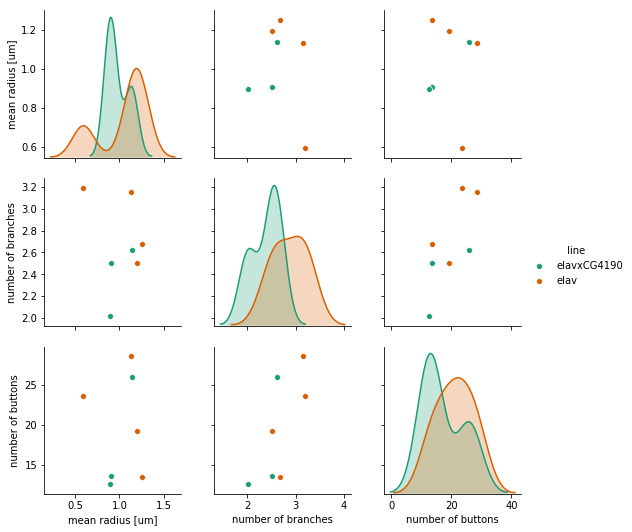

In [7]:
sns.pairplot(df, hue="line", palette="Dark2")
plt.savefig("dependencies")

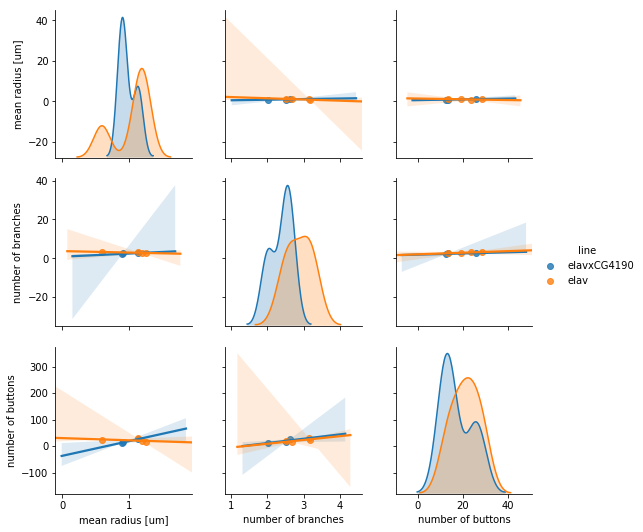

In [8]:
sns.pairplot(df, hue="line", kind="reg")

In [9]:
# plot above shows linear reggression for number buttons/ mean radius and number of buttons/number of branches

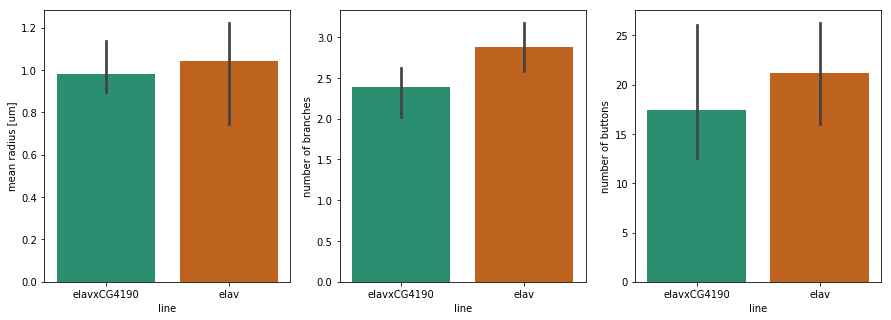

In [10]:
exp = ['mean radius [um]', 'number of branches', 'number of buttons']
palette="Dark2"
def plots(kind):
    
    fig = plt.figure(figsize=(15, 5))
    
    axes = fig.subplots(1, 3).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=df, x="line", y=y, kind=kind, ax=axes[i], palette=palette)
        plt.close(p.fig)
        
plots("bar")
# plt.savefig("behavioral_tests_plot-elav")

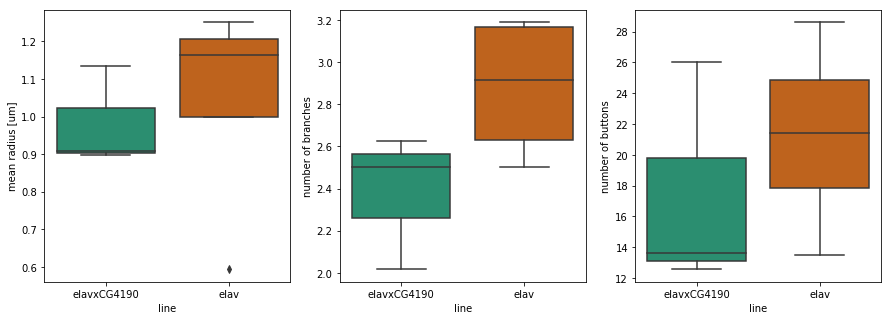

In [11]:
plots("box")
 # plt.savefig("boxes")

In [12]:
exp = ['mean radius [um]', 'number of branches', 'number of buttons']

for i in exp:
    print(str(i))
    print(ttest_ind(df[df.line=="elav"][i],
          df[df.line=="elavxCG4190"][i]))


mean radius [um]
Ttest_indResult(statistic=0.3292469132397199, pvalue=0.7553133864892632)
number of branches
Ttest_indResult(statistic=1.9403556560060342, pvalue=0.11002071779905635)
number of buttons
Ttest_indResult(statistic=0.7318562160235221, pvalue=0.49710196628330783)
